<a href="https://colab.research.google.com/github/raphaelkach/Unfall_Data_Exploration_Project/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vorhersage eines tödlichen Unfalls und Identifikation relevanter Einflussfaktoren

- Wenn Ihr Analysefokus überwiegend auf Unfällen mit Standard-PKW und den allgemeinen Unfallmerkmalen liegt

## Git clone Unfall_Data_Exploration_Project

In [1]:
!apt-get install git-lfs
!git lfs install

!git clone https://github.com/raphaelkach/Unfall_Data_Exploration_Project.git

%cd Unfall_Data_Exploration_Project
!git lfs pull

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Git LFS initialized.
fatal: destination path 'Unfall_Data_Exploration_Project' already exists and is not an empty directory.
/content/Unfall_Data_Exploration_Project


In [2]:
%cd data/raw/FARS_2021_National

/content/Unfall_Data_Exploration_Project/data/raw/FARS_2021_National


In [3]:
# Imports
import pandas as pd

# accident.csv
- SCH_BUS, SCH_BUSNAME entfernen zu spezifisch und machen nur 0.24 % aus
- STATE wurde entfernt, da es redundant zu STATENAME ist.
- COUNTY wurde entfernt, da es redundant zu COUNTYNAME ist.
- CITY wurde entfernt, da es redundant zu CITYNAME ist.
- MONTHNAME wurde entfernt, da es redundant zu MONTH ist.
- DAYNAME wurde entfernt, da es redundant zu DAY ist.
- RD_OWNERNAME wurde entfernt, da es redundant zu RD_OWNER ist.
- WRK_ZONE, WRK_ZONENAME entfernt, da 97 % der Werte NaN sind
- RAIL, RAILNAME entfernen da 99% not Applicable (Kann vielleicht genutzt werden ob eine Bahnübergang ein deutlichen Unfall nachsich zieht) Bisher nur RAIL entfernt
- 97% PVH entfernt, da 97 % 0 sind

In [4]:
df = pd.read_csv("accident.csv", encoding='ISO-8859-1')
# Tabellenbeginn ausgeben
df.head()
# normalize die relativen Werte anzeigen
df['SCH_BUS'].value_counts(normalize=True, dropna=False).head(10) * 100
df['SCH_BUSNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['STATE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['WRK_ZONE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['WRK_ZONENAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RAIL'].value_counts(normalize=True, dropna=False).head(10) * 100
df['PVH_INVL'].value_counts(normalize=True, dropna=False).head(10) * 100
df['COUNTY'].value_counts(normalize=True, dropna=False).head(10) * 100
df['CITY'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MONTHNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['DAYNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HOURNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MINUTENAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RD_OWNERNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LATITUDE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LATITUDENAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LONGITUD'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LONGITUDNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['YEAR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NHS'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NHSNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RD_OWNER'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RELJCT1'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RELJCT1NAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['FUNC_SYS'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MILEPT'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MILEPTNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['WEATHER'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RUR_URB'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LGT_COND'].value_counts(normalize=True, dropna=False).head(10) * 100
df['DAY_WEEK'].value_counts(normalize=True, dropna=False).head(10) * 100
df['LGT_COND'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NOT_MIN'].value_counts(normalize=True, dropna=False).head(10) * 100
df['REL_ROAD'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HOSP_HRNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['ARR_HOURNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HOSP_MN'].value_counts(normalize=True, dropna=False).head(10) * 100
df['ROUTE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['SP_JUR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['SP_JURNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['ARR_MINNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HOSP_HR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HOSP_MNNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['ARR_MIN'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NOT_HOUR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NOT_HOURNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['ARR_HOUR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NOT_MINNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RAILNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['TYP_INT'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MAN_COLL'].value_counts(normalize=True, dropna=False).head(10) * 100
df['HARM_EV'].value_counts(normalize=True, dropna=False).head(10) * 100
df['RELJCT2'].value_counts(normalize=True, dropna=False).head(10) * 100
df['TWAY_ID2'].value_counts(normalize=True, dropna=False).head(10) * 100
df['TWAY_ID'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
TWAY_ID,
I-10,0.799296
I-95,0.706296
US-1,0.578107
I-40,0.535378
I-20,0.490134
I-75,0.485107
I-5,0.459972
I-80,0.374513
I-70,0.354405


In [5]:
#Spalten die nicht benötigt werden, sollen direkt gelöscht werden
df.drop(['SCH_BUS', 'SCH_BUSNAME', 'STATE', 'WRK_ZONE', 'WRK_ZONENAME', 'RAIL', 'PVH_INVL', 'COUNTY', 'CITY', 'MONTHNAME', 'DAYNAME', 'HOURNAME', 'MINUTENAME', 'RD_OWNERNAME', 'RD_OWNER',
         'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'YEAR', 'NHS', 'NHSNAME', 'RELJCT1', 'RELJCT1NAME', 'FUNC_SYS', 'MILEPT', 'MILEPTNAME', 'WEATHER', 'RUR_URB', 'LGT_COND',
         'DAY_WEEK', 'NOT_MIN', 'REL_ROAD', 'HOSP_HRNAME', 'ARR_HOURNAME', 'HOSP_MN', 'ROUTE', 'SP_JUR', 'SP_JURNAME', 'ARR_MINNAME', 'HOSP_HR', 'HOSP_MNNAME', 'ARR_MIN', 'NOT_HOUR',
         'NOT_HOURNAME', 'ARR_HOUR', 'NOT_MINNAME', 'RAILNAME', 'TYP_INT', 'MAN_COLL', 'HARM_EV', 'RELJCT2', 'TWAY_ID', 'TWAY_ID2'], axis=1, inplace=True)

In [6]:
# Wie viele Spalten gibt es insgesamt?
print(df.columns)

Index(['STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS',
       'PERSONS', 'PERMVIT', 'COUNTYNAME', 'CITYNAME', 'MONTH', 'DAY',
       'DAY_WEEKNAME', 'HOUR', 'MINUTE', 'ROUTENAME', 'RUR_URBNAME',
       'FUNC_SYSNAME', 'HARM_EVNAME', 'MAN_COLLNAME', 'RELJCT2NAME',
       'TYP_INTNAME', 'REL_ROADNAME', 'LGT_CONDNAME', 'WEATHERNAME', 'FATALS'],
      dtype='object')


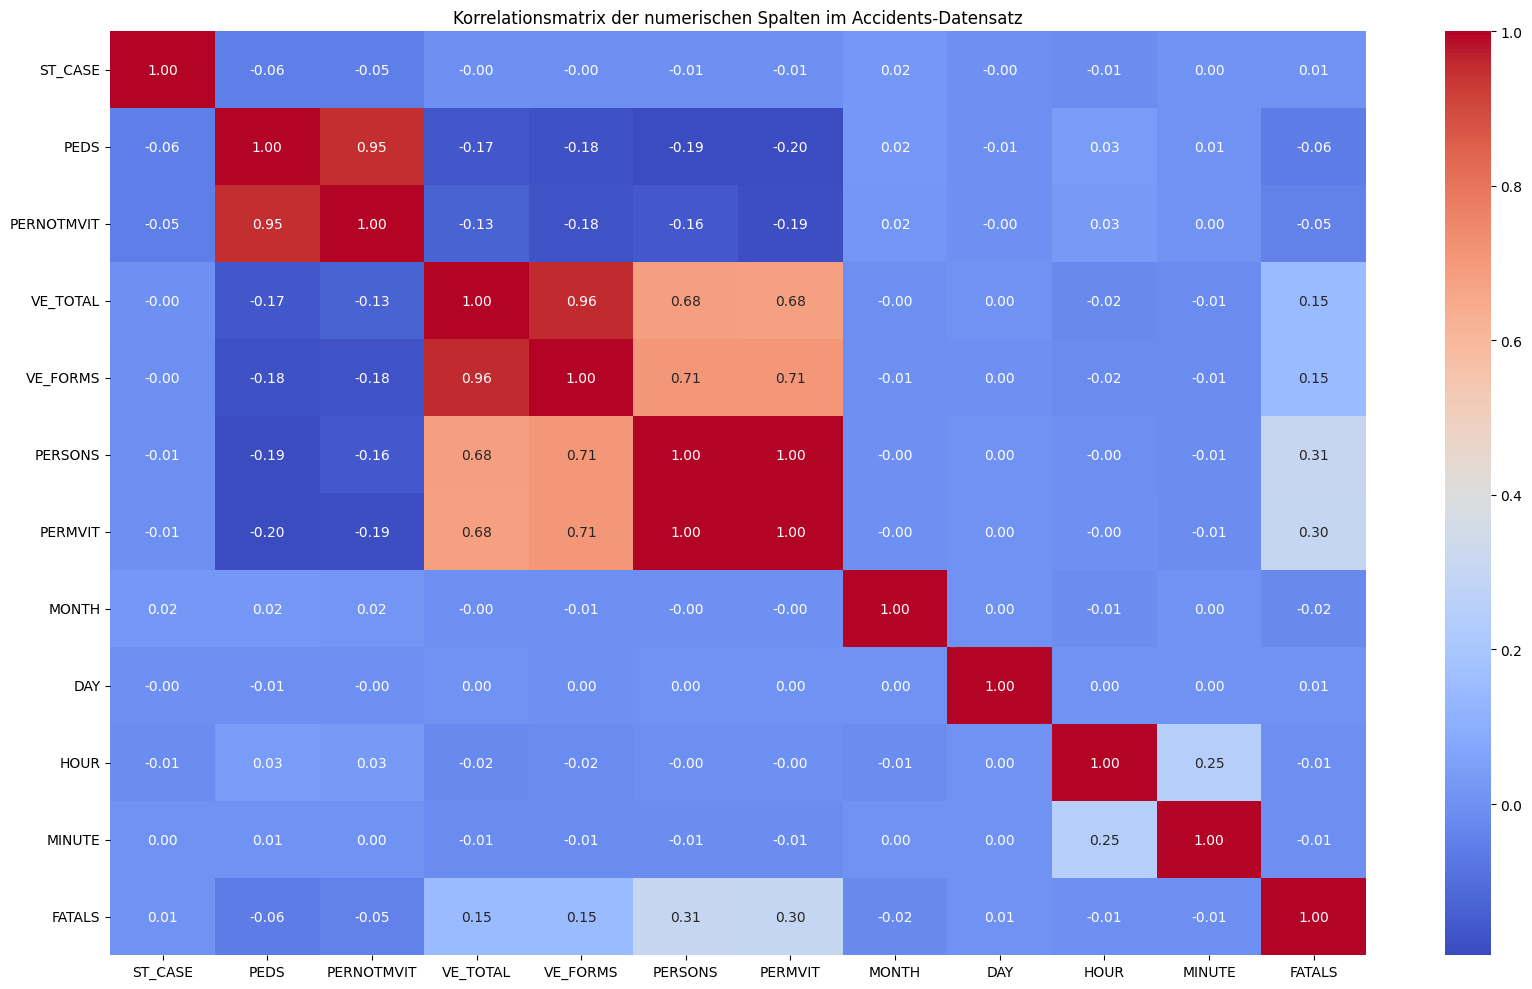

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Automatisch alle numerischen Spalten auswählen
numeric_df = df.select_dtypes(include=[np.number])

# 3. Korrelationsmatrix berechnen
corr_matrix = numeric_df.corr()

# 4. Heatmap visualisieren
plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der numerischen Spalten im Accidents-Datensatz')
plt.tight_layout()
plt.show()

# cevent.csv
Für unser Projekt, das sich auf die Vorhersage tödlicher Unfälle konzentriert, ist cevent.csv nicht zwingend notwendig. Diese Datei dokumentiert die chronologische Abfolge von Ereignissen (sowohl schädliche als auch nicht schädliche), die sich aus einer nicht stabilisierten Situation ergeben und einen Verkehrsunfall mit Kraftfahrzeugen darstellen.

In [8]:
df = pd.read_csv('cevent.csv', encoding='ISO-8859-1')
df.columns
df['EVENTNUM'].value_counts(normalize=True, dropna=False).head(10) * 100
df['VNUMBER1'].value_counts(normalize=True, dropna=False).head(10) * 100
df['AOI1'].value_counts(normalize=True, dropna=False).head(10) * 100
df['AOI1NAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['SOE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['SOENAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['VNUMBER2'].value_counts(normalize=True, dropna=False).head(10) * 100
df['VNUMBER2NAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['AOI2'].value_counts(normalize=True, dropna=False).head(10) * 100
df['AOI2NAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
AOI2NAME,
Not a Motor Vehicle,45.716295
Non-Harmful Event,33.706097
12 Clock Point,6.461822
6 Clock Point,4.335136
9 Clock Point,1.496330
3 Clock Point,1.236098
11 Clock Point,0.979384
Left,0.673436
Not Reported,0.644424


# crashrf.csv
Für unser Projekt, das sich auf die Vorhersage tödlicher Unfälle und die Identifikation zentraler Einflussfaktoren konzentriert, ist crashrf.csv nicht zwingend erforderlich. Diese Datei enthält zusätzliche Informationen zu ungewöhnlichen Bedingungen und besonderen Umständen, die im Zusammenhang mit dem Unfall stehen, jedoch liefern die zentralen Datensätze (wie accidents.csv, vehicle.csv und person.csv) bereits die wesentlichen Einflussfaktoren.



In [9]:
df = pd.read_csv('crashrf.csv', encoding='ISO-8859-1')
df.columns
df['CRASHRF'].value_counts(normalize=True, dropna=False).head(10) * 100
df['CRASHRFNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
CRASHRFNAME,
NaN,91.233540
"Motor Vehicle struck by falling cargo,or something that came loose from or something that was set in motion by a vehicle",2.364326
Indication of a Stalled/Disabled Vehicle,1.294393
Recent/Previous Crash scene Nearby,1.122306
Police Pursuit Involved,1.094872
Reported as Unknown,0.803073
Emergency Vehicle Related,0.321728
"Non-occupant struck by falling cargo, or something that came loose from, or something that was set in motion by a vehicle",0.261872
Regular Congestion,0.246907


# damage.csv
Für den Fokus auf die Vorhersage tödlicher Unfälle und die Identifikation zentraler Einflussfaktoren ist damage.csv nicht zwingend erforderlich. Diese Datei enthält detaillierte Angaben dazu, welche Bereiche eines Fahrzeugs beim Unfall beschädigt wurden, was für eine vertiefte Schadensanalyse interessant sein kann, aber in unserem Projekt nicht den Kernbereich abdeckt.

In [10]:
df = pd.read_csv('damage.csv', encoding='ISO-8859-1')
df.columns
df['DAMAGE'].value_counts(normalize=True, dropna=False).head(5) * 100
df['DAMAGENAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
DAMAGENAME,
12 Clock Value,16.913671
11 Clock Value,9.174595
1 Clock Value,8.677919
10 Clock Value,7.259934
2 Clock Value,6.757540


# distract.csv

distract.csv dokumentiert Ablenkungen von Fahrern (z. B. Handy-Nutzung, Essen, etc.) zum Zeitpunkt des Unfalls. Für die Vorhersage tödlicher Unfälle ist sie nicht zwingend erforderlich, da zentrale Fahrerinformationen bereits in person.csv enthalten sind. Bei einer vertieften Analyse zum Einfluss von Ablenkungen könnte distract.csv jedoch zusätzliche Einblicke bieten.

In [11]:
df = pd.read_csv('distract.csv', encoding='ISO-8859-1')
df.columns
df['DRDISTRACT'].value_counts(normalize=True, dropna=False).head(10) * 100
df['DRDISTRACTNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
DRDISTRACTNAME,
Not Reported,50.570957
Not Distracted,29.194837
Reported as Unknown if Distracted,14.139682
"Inattention (Inattentive), Details Unknown",2.096205
"Distraction (Distracted), Details Unknown",1.107948
No Driver Present/Unknown if Driver present,0.640507
"Distracted by Outside Person, Object or Event",0.449649
Distraction/Inattention,0.308932
By Other Occupant(s),0.255556


# drimpair.csv
Die drimpair.csv enthält Informationen zu körperlichen Beeinträchtigungen (Impairments) von Fahrern am Unfallzeitpunkt. Für die Vorhersage tödlicher Unfälle ist sie nicht zwingend erforderlich, da grundlegende Fahrerinformationen bereits in person.csv enthalten sind. Sie kann jedoch bei einer vertiefenden Analyse (z. B. medizinische Faktoren) hilfreich sein.

In [12]:
df = pd.read_csv('drimpair.csv', encoding='ISO-8859-1')
df.columns
df['DRIMPAIR'].value_counts(normalize=True, dropna=False).head(10) * 100
df['DRIMPAIRNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
DRIMPAIRNAME,
None/Apparently Normal,40.059993
Not Reported,24.345638
Reported as Unknown if Impaired,20.436402
"Under the Influence of Alcohol, Drugs or Medication",11.210025
Asleep or Fatigued,1.030529
"Ill, Blackout",0.945055
Physical Impairment - No Details,0.680568
No Driver Present/Unknown if Driver Present,0.638638
"Emotional (depressed, angry, disturbed, etc.)",0.345122


# driverrf.csv
Für unseren Fokus ist driverrf.csv optional, da die wesentlichen Fahrerinformationen bereits in anderen zentralen Datensätzen (wie person.csv) enthalten sind. Diese Datei liefert ergänzende Faktoren, die spezielle Fahrerbedingungen, ungewöhnliche Situationen und besondere Umstände abbilden, die für eine vertiefende Analyse interessant sein könnten, aber für die Kernfragestellung nicht zwingend erforderlich sind.

In [13]:
df = pd.read_csv('driverrf.csv', encoding='ISO-8859-1')
df.columns
df['DRIVERRF'].value_counts(normalize=True, dropna=False).head(10) * 100
df['DRIVERRFNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
DRIVERRFNAME,
NaN,54.286805
"Careless Driving, Inattentive Operation, Improper Driving, Driving Without Due Care",6.800164
Failure to Yield Right-of-Way,6.406718
Improper Lane Usage,6.027952
"Operating the Vehicle in an Erratic, Reckless or Negligent Manner.",4.009337
"Failure to Obey Actual Traffic Signs, Traffic Control Devices, or Traffic Officers. Failure to Obey Safety Zone Traffic Laws",3.686359
Reported as Unknown,2.777615
Overcorrecting,2.764402
Driving on Wrong Side of Two-Way Trafficway (Intentional or Unintentional),1.632509


# drugs.csv
Für den Fokus „Vorhersage eines tödlichen Unfalls und Identifikation relevanter Einflussfaktoren“ ist die Verwendung von drugs.csv optional, da zentrale Alkohol- und Fahrerinformationen bereits in person.csv und anderen Kern-Datensätzen enthalten sein können.

In [14]:
df = pd.read_csv('drugs.csv', encoding='ISO-8859-1')
df.columns
df['DRUGSPEC'].value_counts(normalize=True, dropna=False).head(5) * 100
df['DRUGSPECNAME'].value_counts(normalize=True, dropna=False).head(5) * 100
df['DRUGRES'].value_counts(normalize=True, dropna=False).head(5) * 100
df['DRUGRESNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
DRUGRESNAME,
Test Not Given,46.273842
"Tested, No Drugs Found/Negative",12.176620
Not Reported,8.176486
Other Drug,6.718917
Tetrahydrocannabinols (THC),2.968004
METHAMPHETAMINE,2.921013
AMPHETAMINE,2.844652
DELTA 9,2.541726
"Cannabinoid, Type Unknown",2.536691


# factor.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle ist factor.csv nicht zwingend erforderlich, da wesentliche Fahrzeuginformationen bereits in vehicle.csv abgebildet sind. Die factor.csv liefert ergänzende Details zu spezifischen Fahrzeugumständen, die potenziell zum Unfall beigetragen haben könnten.



In [15]:
df = pd.read_csv('factor.csv', encoding='ISO-8859-1')
df.columns
df['VEHICLECC'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VEHICLECCNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
VEHICLECCNAME,
None Noted,92.204288
Reported as Unknown,5.772866
Tires,0.904787
Brake System,0.239122
Other,0.201961


# maneuver.csv
Für unser Projekt ist maneuver.csv optional, da es spezifische Informationen zu den Vermeidungsmanövern des Fahrers liefert, die für die grundlegende Vorhersage tödlicher Unfälle nicht zentral sind.

In [16]:
df = pd.read_csv('maneuver.csv', encoding='ISO-8859-1')
df.columns
df['MANEUVER'].value_counts(normalize=True, dropna=False).head(10) * 100
df['MANEUVERNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
MANEUVERNAME,
Not Reported,66.071255
Driver Did Not Maneuver to Avoid,20.703492
Contact Motor Vehicle (In this crash),6.936220
Reported as Unknown,2.595217
"Pedestrian, Pedalcyclist or Other Non-Motorist",1.705336
Phantom/Non-Contact Motor Vehicle,1.011229
No Driver Present/Unknown if Driver present,0.640714
Live Animal,0.163415
Object,0.152089


# MIACC.CSV, MIDRVACC.CSV, MIPER.CSV
Für unser Projekt, das sich auf die Vorhersage tödlicher Unfälle und die Identifikation relevanter Risikofaktoren konzentriert, sind MIACC.CSV, MIDRVACC.CSV und MIPER.CSV optional, da grundlegende Alkoholindikatoren bereits in den zentralen Datensätzen (wie person.csv, z. B. über die Variable DRINKING) enthalten sein können.


# nmcrash.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle und die Analyse zentraler Risikofaktoren ist nmcrash.csv nicht zwingend erforderlich, da sie sich speziell auf Handlungen von Personen bezieht, die keine Insassen von Kraftfahrzeugen sind (z. B. Fußgänger oder Fahrradfahrer), welche in unserer Kernanalyse nur einen untergeordneten Aspekt darstellen.

In [17]:
df = pd.read_csv('nmcrash.csv', encoding='ISO-8859-1')
df.columns
df['NMCC'].value_counts(normalize=True, dropna=False).head(5) * 100
df['NMCCNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
NMCCNAME,
Failure to Yield Right-Of-Way,34.353636
None Noted,17.371038
Improper Crossing of Roadway or Intersection (Jaywalking),11.513362
"In Roadway Improperly (Standing, Lying, Working, Playing, etc.)",7.753263
"Not Visible (Dark clothing, No Lighting, etc.)",7.193909


# nmdistract.csv
Für unser Projekt, das sich auf die Vorhersage tödlicher Unfälle und die Analyse zentraler Risikofaktoren konzentriert, ist nmdistract.csv nicht zwingend notwendig, da diese Datei Ablenkungen von Personen erfasst, die keine Insassen von Kraftfahrzeugen sind – ein Aspekt, der in unserer Kernanalyse nur eine untergeordnete Rolle spielt.

In [18]:
df = pd.read_csv('nmdistract.csv', encoding='ISO-8859-1')
df.columns

df['NMDISTRACT'].value_counts(normalize=True, dropna=False).head(5) * 100
df['NMDISTRACTNAME'].value_counts(normalize=True, dropna=False).head(15) * 100

,proportion
NMDISTRACTNAME,
Not Reported,77.532468
Not Distracted,11.764069
Reported as Unknown if Distracted,7.337662
"Inattention (Inattentive), Details Unknown",0.963203
"Distraction (Distracted), Details Unknown",0.746753
"Distracted by Animal, Other Object, Event, or Activity",0.465368
Distraction/Inattention,0.270563
By Other Non-Motorist(s),0.205628
While Talking or Listening to Mobile Phone,0.194805


# nmimpair.csv
Für unseren Analysefokus ist nmimpair.csv nicht zwingend erforderlich, da es Informationen zu körperlichen Beeinträchtigungen von Personen liefert, die keine Insassen von Kraftfahrzeugen sind – ein Aspekt, der im Rahmen der Vorhersage tödlicher Unfälle eher eine untergeordnete Rolle spielt.

In [19]:
df = pd.read_csv('nmimpair.csv', encoding='ISO-8859-1')
df.columns
df['NMIMPAIR'].value_counts(normalize=True, dropna=False).head(5) * 100
df['NMIMPAIRNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
NMIMPAIRNAME,
Not Reported,41.647770
Reported as Unknown if Impaired,28.949358
None/Apparently Normal,18.280963
"Under the Influence of Alcohol, Drugs or Medication",8.778750
Physical Impairment - No Details,0.637080


# nmprior.csv
Für unseren Analysefokus ist nmprior.csv nicht zentral, da diese Datei ausschließlich das Verhalten von Personen dokumentiert, die keine Insassen sind (z. B. Fußgänger und Fahrradfahrer), und somit nur einen untergeordneten Aspekt des Unfallgeschehens abdeckt.

In [20]:
df = pd.read_csv('nmprior.csv', encoding='ISO-8859-1')
df.columns

df['NMACTION'].value_counts(normalize=False, dropna=False).head(5)
df['NMACTIONNAME'].value_counts(normalize=False, dropna=False).head(5)

,count
NMACTIONNAME,
Crossing Roadway,4818
Movement Along Roadway with Traffic (In or Adjacent to Travel Lane),1350
"In Roadway - Other (Working, Playing, Etc.)",1035
"Disabled Vehicle Related (Working on, Pushing, Leaving/Approaching)",596
Movement Along Roadway Against Traffic (In or Adjacent to Travel Lane),302


# parkwork.csv
Da sich unser Analysefokus auf Unfälle im laufenden Verkehr und die damit verbundenen Unfall- sowie Fahrzeugmerkmale konzentriert, liefert parkwork.csv, das Informationen zu geparkten bzw. im Einsatz befindlichen Fahrzeugen enthält, keine zusätzlichen relevanten Erkenntnisse. Daher wird parkwork.csv in unserem Code nicht berücksichtigt.

In [21]:
df = pd.read_csv('parkwork.csv', encoding='ISO-8859-1')
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO', 'PVE_FORMS', 'PMONTH',
       'PMONTHNAME', 'PDAY', 'PDAYNAME', 'PHOUR',
       ...
       'PVIN_4', 'PVIN_5', 'PVIN_6', 'PVIN_7', 'PVIN_8', 'PVIN_9', 'PVIN_10',
       'PVIN_11', 'PVIN_12', 'PDEATHS'],
      dtype='object', length=115)

# pbtype.csv
Für den Fokus „Vorhersage eines tödlichen Unfalls und Identifikation relevanter Einflussfaktoren“ ist pbtype.csv nicht zentral, da diese Datei speziell Unfälle zwischen Kraftfahrzeugen und Fußgängern, Fahrradfahrern sowie Personen auf privaten Transportmitteln dokumentiert – ein relativ spezieller Fall, der in der Gesamtanalyse nur eine untergeordnete Rolle spielt.

# person.csv
Ja, person.csv ist essenziell, da sie detaillierte Informationen zu allen am Unfall beteiligten Personen liefert – von Fahrern über Passagiere bis hin zu Fußgängern.

# personrf.csv
Für unseren Fokus ist personrf.csv nicht zwingend erforderlich, da die wesentlichen Personeninformationen bereits in person.csv enthalten sind. Die personrf.csv liefert ergänzende Faktoren zu jeder am Unfall beteiligten Person (sowohl Insassen als auch Nicht-Insassen), was für weiterführende Analysen interessant sein könnte, aber für die grundlegende Vorhersage tödlicher Unfälle weniger zentral ist.

In [22]:
df = pd.read_csv('personrf.csv', encoding='ISO-8859-1')
df.columns
df['PERSONRF'].value_counts(normalize=True, dropna=False).head(5) * 100
df['PERSONRFNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
PERSONRFNAME,
NaN,99.093547
*Traveling on Prohibited Trafficways,0.246096
Reported as Unknown,0.181496
Non-Operator Flees Scene,0.061524
Construction/Maintenance/Utility Worker,0.043067


# pvehiclesf.csv
Für unser Projekt, das sich auf die Vorhersage tödlicher Unfälle konzentriert, ist pvehiclesf.csv nicht zwingend erforderlich, da sie Faktoren zu geparkten und im Einsatz befindlichen Fahrzeugen enthält – Aspekte, die für unsere Kernanalyse weniger relevant sind.

In [23]:
df = pd.read_csv('pvehiclesf.csv', encoding='ISO-8859-1')
df.columns
df['PVEHICLESF'].value_counts(normalize=True, dropna=False).head(10) * 100
df['PVEHICLESFNAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
PVEHICLESFNAME,
NaN,98.814898
"Other Working Vehicle (Not Construction, Maintenance, Utility, Police, Fire, or EMS Vehicle)",0.620767
"Police, Fire, or EMS Vehicle Working at the Scene of an Emergency or Performing Other Traffic Control Activities",0.451467
Reported as Unknown,0.112867


# race.csv
Der Datensatz `race.csv` liefert zwar Rasseninformationen der verstorbenen Personen, jedoch sind diese Daten für die Vorhersage tödlicher Unfälle nicht zentral.

In [24]:
df = pd.read_csv('race.csv', encoding='ISO-8859-1')
df.columns

<ipython-input-24-42aabc386a14>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('race.csv', encoding='ISO-8859-1')


Index(['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO', 'PER_NO', 'RACE', 'RACENAME',
       'ORDER', 'ORDERNAME', 'MULTRACE', 'MULTRACENAME'],
      dtype='object')

# safetyeq.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle ist safetyeq.csv nicht zwingend erforderlich, da diese Datei vor allem die von Personen (die keine Insassen in Kraftfahrzeugen sind) verwendete Sicherheitsausrüstung dokumentiert – ein Aspekt, der in unserer Kernanalyse nur eine untergeordnete Rolle spielt.

In [25]:
df = pd.read_csv('safetyeq.csv', encoding='ISO-8859-1')
df.columns
df['NMHELMET'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMHELMETNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMPROPAD'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMPROPADNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMOTHPRO'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMOTHPRONAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMREFCLO'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMREFCLONAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMLIGHT'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMLIGHTNAME'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMOTHPRE'].value_counts(normalize=True, dropna=False).head(10) * 100
df['NMOTHPRENAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
NMOTHPRENAME,
Not Reported,68.511099
No,30.720087
Reported as Unknown,0.476448
Yes,0.292366


# vehicle.csv
Ja, vehicle.csv ist für unser Projekt essenziell, da es umfassende Informationen zu den im Transport befindlichen Fahrzeugen liefert – beispielsweise zu Fahrzeugtyp, Hersteller, Modell, Baujahr, Unfallbedingungen und spezifischen Fahrzeugzuständen –, die als potenzielle Einflussfaktoren für die Unfallfatalität berücksichtigt werden können.

# vehiclesf.csv
Da über 99 % der Einträge in `vehiclesf.csv` in der Spalte `VEHICLESFNAME` leer (NaN) sind, liegen kaum verwertbare Informationen vor. Deshalb bietet dieser Datensatz keinen Mehrwert für die Analyse und wird nicht weiter berücksichtigt.

In [26]:
df = pd.read_csv("vehiclesf.csv", encoding='ISO-8859-1')
df.columns
df['VEHICLESF'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VEHICLESFNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
VEHICLESFNAME,
NaN,98.993576
Reported as Unknown,0.440108
Vehicle Registration for a Person with a Disability,0.326845
"Other Working Vehicle (Not Construction, Maintenance, Utility, Police, Fire, or EMS Vehicle)",0.092229
"Police, Fire, or EMS Vehicle Working at the Scene of an Emergency or Performing Other Traffic Control Activities",0.045305


# vevent.csv

In [27]:
df = pd.read_csv('vevent.csv', encoding='ISO-8859-1')
df.columns
df['VEVENTNUM'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VNUMBER1'].value_counts(normalize=True, dropna=False).head(5) * 100
df['AOI1'].value_counts(normalize=True, dropna=False).head(5) * 100
df['SOE'].value_counts(normalize=True, dropna=False).head(5) * 100
df['SOENAME'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VNUMBER2'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VNUMBER2NAME'].value_counts(normalize=True, dropna=False).head(5) * 100
df['AOI2'].value_counts(normalize=True, dropna=False).head(5) * 100
df['AOI2NAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
AOI2NAME,
Not a Motor Vehicle,37.914415
Non-Harmful Event,27.953861
12 Clock Point,10.718114
6 Clock Point,7.190615
9 Clock Point,2.481936


# violatn.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle und die Identifikation zentraler Risikofaktoren ist violatn.csv nicht zwingend erforderlich, da diese Datei Informationen über Fahrerverstöße enthält – Aspekte, die zwar in einer erweiterten Analyse interessant sein könnten, aber für die Kernfragestellung weniger relevant sind.

In [28]:
df = pd.read_csv("violatn.csv", encoding='ISO-8859-1')
# Tabellenbeginn ausgeben
df.columns
df['VIOLATION'].value_counts(normalize=True, dropna=False).head(5) * 100
df['VIOLATIONNAME'].value_counts(normalize=True, dropna=False).head(5) * 100

,proportion
VIOLATIONNAME,
NaN,82.917553
Manslaughter or homicide,1.952883
Driving while intoxicated (alcohol or drugs) or BAC above limit (any detectable BAC for CDLs),1.924209
Other driver license violations,0.971914
Fail to yield generally,0.940221


# vision.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle ist vision.csv nicht zwingend erforderlich, da zentrale Umwelt- und Unfallmerkmale bereits in den Hauptdatensätzen (z. B. accidents.csv, vehicle.csv) abgebildet sind. Die Informationen zu Sichtbehinderungen liefern zwar zusätzliche Details, sind jedoch für die Kernfragestellung nur von untergeordneter Bedeutung.

Datensatz vision.csv kann nicht genutzt werden da 93% der personenbezogene Faktoren in der Spalte PERSONRF nicht vorhanden sind also NaN sind.

In [29]:
df = pd.read_csv('vision.csv', encoding='ISO-8859-1')
df.columns
df['VISION'].value_counts(normalize=True, dropna=False).head(10) * 100
df['VISIONNAME'].value_counts(normalize=False, dropna=False).head(10)

# Spalten mit den Zahlen VISION zu VISIONNAME löschen
df.drop(['VISION'], axis=1, inplace=True)

# vpicdecode.csv
vpicdecode.csv ist optional, da die grundlegenden Fahrzeugmerkmale bereits in vehicle.csv enthalten sind. Diese Datei liefert jedoch sehr detaillierte technische Spezifikationen, die durch die Entschlüsselung der Fahrzeug-VIN mittels des NHTSA vPIC-Systems gewonnen werden.

In [30]:
df = pd.read_csv('vpicdecode.csv', encoding='ISO-8859-1')
df.columns

<ipython-input-30-5d5d8e163aa5>:1: DtypeWarning: Columns (62,88,100,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vpicdecode.csv', encoding='ISO-8859-1')


Index(['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO', 'VEHICLEDESCRIPTOR',
       'VINDECODEDON', 'VINDECODEERROR', 'VEHICLETYPEID', 'VEHICLETYPE',
       'MANUFACTURERFULLNAMEID',
       ...
       'TRACTIONCONTROL', 'AUTOPEDESTRIANALERTINGSOUNDID',
       'AUTOPEDESTRIANALERTINGSOUND', 'KEYLESSIGNITIONID', 'KEYLESSIGNITION',
       'SAEAUTOMATIONLEVEL_FROM', 'SAEAUTOMATIONLEVEL_TO',
       'AUTOREVERSESYSTEMID', 'AUTOREVERSESYSTEM', 'ACTIVESAFETYSYSNOTE'],
      dtype='object', length=204)

# vpictrailerdecode.csv
Die vpictrailerdecode.csv liefert detaillierte technische Informationen zu Anhängern. Anhänger spielen in der Gesamtanalyse nur eine untergeordnete Rolle und liefern keinen signifikanten Mehrwert für die Modellierung der Unfallfatalität.

In [31]:
df = pd.read_csv('vpictrailerdecode.csv', encoding='ISO-8859-1')
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO', 'TRAILER_NO',
       'VEHICLEDESCRIPTOR', 'VINDECODEDON', 'VINDECODEERROR', 'VEHICLETYPEID',
       'VEHICLETYPE', 'MANUFACTURERFULLNAMEID', 'MANUFACTURERFULLNAME',
       'MAKEID', 'MAKE', 'MODELID', 'MODEL', 'MODELYEAR', 'SERIES', 'TRIM',
       'PLANTCOUNTRYID', 'PLANTCOUNTRY', 'PLANTSTATE', 'PLANTCITY',
       'PLANTCOMPANYNAME', 'NONLANDUSEID', 'NONLANDUSE', 'NOTE', 'BODYCLASSID',
       'BODYCLASS', 'GROSSVEHICLEWEIGHTRATINGFROMID',
       'GROSSVEHICLEWEIGHTRATINGFROM', 'GROSSVEHICLEWEIGHTRATINGTOID',
       'GROSSVEHICLEWEIGHTRATINGTO', 'TRAILERBODYTYPEID', 'TRAILERBODYTYPE',
       'TRAILERTYPECONNECTIONID', 'TRAILERTYPECONNECTION', 'TRAILERLENGTHFT',
       'OTHERTRAILERINFO', 'AXLESCOUNT', 'AXLECONFIGURATIONID',
       'AXLECONFIGURATION'],
      dtype='object')

# vsoe.csv
Für unseren Fokus auf die Vorhersage tödlicher Unfälle liefert vsoe.csv detaillierte Ereignisabfolgen für jedes am Unfall beteiligte Fahrzeug, ist aber für die Kernanalyse nicht zwingend notwendig, da wesentliche Informationen bereits in den zentralen Datensätzen enthalten sind.

In [32]:
df = pd.read_csv('vsoe.csv', encoding='ISO-8859-1')
df.columns
df['VEVENTNUM'].value_counts(normalize=True, dropna=False).head(10) * 100
#df['SOE'].value_counts(normalize=True, dropna=False).head(10) * 100
#df['SOENAME'].value_counts(normalize=True, dropna=False).head(10) * 100
#df['AOI'].value_counts(normalize=True, dropna=False).head(10) * 100
#df['AOINAME'].value_counts(normalize=True, dropna=False).head(10) * 100

,proportion
VEVENTNUM,
1,45.826862
2,22.046503
3,14.258737
4,8.124622
5,4.285787
6,2.140706
0,1.324817
7,1.050667
8,0.475388


# weather.csv
##Stimmen die Wetterdaten aus weather.csv mit denen aus accident.csv überein?

Ja, das tun sie. Allerdings treten bei etwa 400 Werten Duplikate auf – das heißt, 400 Werte kommen doppelt vor, jedoch nicht häufiger (z.B. nicht dreifach). Davon entsprechen 90% dem ersten Vorkommen und 10% dem zweiten Vorkommen im accident.csv-Datensatz. Das bedeutet, dass die Werte aus weather.csv konsistent mit den Wetterdaten in accident.csv sind.

**Somit wird die weather.csv nicht benötigt, da diese Werte bereits in accident.csv enthalten sind.**

In [33]:
# 1. CSV-Dateien einlesen
df_weather = pd.read_csv('weather.csv', encoding='ISO-8859-1')
df_accident = pd.read_csv('accident.csv', encoding='ISO-8859-1')

# 2. Duplikate in ST_CASE anzeigen (optional zur Überprüfung)
duplicates_weather = df_weather[df_weather.duplicated('ST_CASE', keep=False)]
duplicates_accident = df_accident[df_accident.duplicated('ST_CASE', keep=False)]

# 3. Duplikate entfernen: Behalte nur den ersten Eintrag pro ST_CASE
df_weather_clean = df_weather.drop_duplicates(subset=['ST_CASE'], keep='first')
df_accident_clean = df_accident.drop_duplicates(subset=['ST_CASE'], keep='first')

df_weather_clean

,STATE,STATENAME,ST_CASE,WEATHER,WEATHERNAME
0,1,Alabama,10001,2,Rain
1,1,Alabama,10002,2,Rain
2,1,Alabama,10003,2,Rain
3,1,Alabama,10004,1,Clear
4,1,Alabama,10005,10,Cloudy
...,...,...,...,...,...
40203,56,Wyoming,560100,1,Clear
40204,56,Wyoming,560101,1,Clear
40205,56,Wyoming,560102,1,Clear
40206,56,Wyoming,560103,1,Clear


In [34]:
# 4. Zusammenführen der DataFrames basierend auf 'ST_CASE'
df_merged = pd.merge(df_accident, df_weather_clean, on='ST_CASE', suffixes=('_acc', '_weather'))

# Vergleich der Spalte 'WEATHERNAME' und Speichern des Ergebnisses als Boolean (True/False)
df_merged['WEATHERNAME_match'] = df_merged['WEATHERNAME_acc'] == df_merged['WEATHERNAME_weather']

In [35]:
# 5. Filter: Zeilen mit False in 'WEATHERNAME_match'
df_false = df_merged[df_merged['WEATHERNAME_match'] == False]

# 6. Anzeige der relevanten Spalten
df_false[['ST_CASE', 'WEATHERNAME_acc', 'WEATHERNAME_weather', 'WEATHERNAME_match']]

,ST_CASE,WEATHERNAME_acc,WEATHERNAME_weather,WEATHERNAME_match
926,20042,Freezing Rain or Drizzle,Rain,False
2069,50047,Freezing Rain or Drizzle,Cloudy,False
6913,80067,Blowing Snow,Severe Crosswinds,False
13217,160044,Blowing Snow,Cloudy,False
15494,190001,Snow,Sleet or Hail,False
15507,190014,Freezing Rain or Drizzle,Cloudy,False
15746,190256,Freezing Rain or Drizzle,Severe Crosswinds,False
18501,250022,Sleet or Hail,Rain,False
18814,250344,Snow,Rain,False
19985,270038,Blowing Snow,Cloudy,False
